# <span style="font-family:Georgia; text-align:center;">Doble péndulo</span> 
<span style="font-family:Georgia;">

<img src="imgs/PenduloDoble.png" width=200>

### Variables y parámetros
- Ángulos $\theta_1(t), \theta_2(t)$ medidos desde la vertical.
- Longitudes $l_1, l_2 > 0$, masas $m_1, m_2 > 0$, gravedad $g>0$.
- Velocidades angulares $\omega_1(t)=\dot\theta_1(t)$, $\omega_2(t)=\dot\theta_2(t)$.

### Ecuaciones de movimiento
Definimos
$$
\Delta = 2m_1 + m_2 - m_2\cos\!\bigl(2\theta_1 - 2\theta_2\bigr).
$$
El sistema de primer orden es
$$
\begin{aligned}
\dot\theta_1 &= \omega_1,\\
\dot\theta_2 &= \omega_2,\\[2pt]
\dot\omega_1 &= \frac{-g(2m_1+m_2)\sin\theta_1 - m_2 g \sin(\theta_1-2\theta_2) - 2\sin(\theta_1-\theta_2)\,m_2\left(\omega_2^2 l_2 + \omega_1^2 l_1 \cos(\theta_1-\theta_2)\right)}{l_1\,\Delta},\\[6pt]
\dot\omega_2 &= \frac{2\sin(\theta_1-\theta_2)\left(\omega_1^2 l_1 (m_1+m_2) + g (m_1+m_2)\cos\theta_1 + \omega_2^2 l_2 m_2 \cos(\theta_1-\theta_2)\right)}{l_2\,\Delta}.
\end{aligned}
$$


<span style="font-family:Georgia;">

## Recordatorio del esquema RK4

Sea $y' = f(t,y)$ en $\mathbb{R}^d$ y paso $h>0$.
$$
\begin{aligned}
k_1 &= f(t_n,\; y_n),\\
k_2 &= f\!\bigl(t_n+\tfrac{h}{2},\; y_n+\tfrac{h}{2}k_1\bigr),\\
k_3 &= f\!\bigl(t_n+\tfrac{h}{2},\; y_n+\tfrac{h}{2}k_2\bigr),\\
k_4 &= f\!\bigl(t_n+h,\; y_n+h\,k_3\bigr),\\[4pt]
y_{n+1} &= y_n + \tfrac{h}{6}\,\bigl(k_1 + 2k_2 + 2k_3 + k_4\bigr).
\end{aligned}
$$

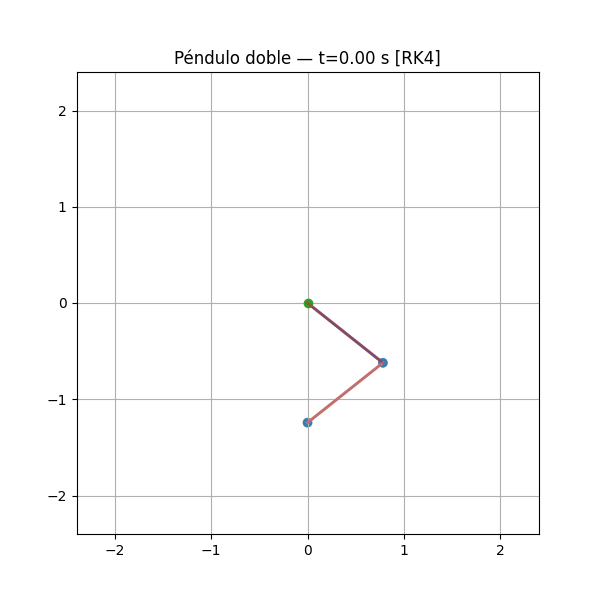

In [6]:
%matplotlib widget
from src.pendulo_doble import *

# Ejecuta el widget
dobles_pendulos_interactivo()

<span style="font-family:Georgia;">

## Ejercicios


1. **Exploración básica:** Con los parámetros por defecto, grafica $ \theta_1(t), \theta_2(t) $ y observa el tipo de movimiento. ¿Cambia algo si duplicas $L_1, L_2$ manteniendo $g$?
2. **Energía mecánica:** Grafica la energía total del sistema $E(t)=T(t)+V(t)$ donde:

La energía cinética $T$ esta compuesta por la rapidez del primer péndulo:  $$v_1 = L_1 |\omega_1|,$$  y la del segundo:
$$
v_2^2 \;=\; L_1^2 \omega_1^2 \;+\; L_2^2 \omega_2^2 \;+\; 2 L_1 L_2 \omega_1 \omega_2 \cos(\theta_1-\theta_2).
$$

Por tanto,
$$
\boxed{
T \;=\; \frac{1}{2} m_1\,L_1^2\,\omega_1^2
\;+\; \frac{1}{2} m_2\!\left(
L_1^2 \omega_1^2 + L_2^2 \omega_2^2 + 2 L_1 L_2 \omega_1 \omega_2 \cos(\theta_1-\theta_2)
\right).
}
$$

La energía potencial $V$ esta compuesta por las alturas (respecto a la vertical hacia abajo) dando lugar a
$$
V \;=\; (m_1+m_2)\,g\,L_1\,(1-\cos\theta_1) \;+\; m_2\,g\,L_2\,(1-\cos\theta_2).
$$
Reporta el **error relativo máximo**: $$\max_t \tfrac {|E(t)-E(0)|}{ E(0)}$$ para tamaños de paso $dt=\{10^{-2}, 5{\times}10^{-3}, 10^{-3}\}$.

3. **Sensibilidad a condiciones iniciales (caos):** Corre dos simulaciones con conidiciones inciales idénticas salvo $\Delta \theta_1(0)=10^{-2}$. ¿Qué observas cuando $t$ es muy grande?

4. **Retratos de fase.** Grafica $(\theta_1 \bmod 2\pi,\ \omega_1)$ y $(\theta_2 \bmod 2\pi,\ \omega_2)$.
5. **Orden de Convergencia:** Con las condiciones iniciales A) del ejercicio 7, calcula una “solución de referencia” con tamaño de paso $dt_\text{ref}$ muy pequeño, por ejemplo $10^{-3}$. Para varios tamaños de paso mas grandes $2dt_\text{ref}, 4dt_\text{ref}$ y $8dt_\text{ref}$ en $[0,30]$. Toma esta aproximación como una solución $y(t)$. Recuerda que el error se define como $e_n=|y(t_n)-\hat{y}(t_n)|$. Haz una gráfica log–log ($e_{n}$ vs $e_{n+1}$). En cualquier punto de la gráfica(por ejemplo el primero) traza una recta de pendiente 4 desde el minimo de los valores hasta el máximo. ¿Qué observas? ¿Tiene sentido? ¿Porqué?
6. **Curva paramétrica de ángulos.** Dibuja $(\theta_1(t),\theta_2(t))$ identificando el tiempo inicial y el tiempo final.  

7. **Condiciones iniciales:** Para el siguiente grupo de condiciones inciales, explica que sucede en el sistema(usa la animación).

### A) Oscilaciones pequeñas
- $L_1=1.0,\ L_2=1.0,\ m_1=1.0,\ m_2=1.0$  
- $\theta_1(0)=0.15,\ \theta_2(0)=-0.12,\ \omega_1(0)=0,\ \omega_2(0)=0$

### B) Cercano a separatriz 
- $L_1=1.0,\ L_2=1.0,\ m_1=1.0,\ m_2=1.0$  
- $\theta_1(0)=2.6,\ \theta_2(0)=0.0,\ \omega_1(0)=0,\ \omega_2(0)=0$

### C) Régimen caótico “clásico”
- $L_1=1.0,\ L_2=1.0,\ m_1=1.0,\ m_2=1.0$  
- $\theta_1(0)=0.9,\ \theta_2(0)=-0.9,\ \omega_1(0)=0,\ \omega_2(0)=0$

### D) Rotación del brazo 1 
- $L_1=1.0,\ L_2=0.7,\ m_1=1.0,\ m_2=0.5$  
- $\theta_1(0)=0.0,\ \theta_2(0)=0.0,\ \omega_1(0)=6.0,\ \omega_2(0)=0.0$

### E) Transferencia de energía marcada 
- $L_1=1.0,\ L_2=1.2,\ m_1=1.0,\ m_2=0.8$  
- $\theta_1(0)=0.7,\ \theta_2(0)=-0.2,\ \omega_1(0)=0.0,\ \omega_2(0)=2.5$

### F) Asimetría de masas 
- $L_1=1.0,\ L_2=1.0,\ m_1=0.8,\ m_2=2.0$  
- $\theta_1(0)=0.6,\ \theta_2(0)=-0.4,\ \omega_1(0)=0.0,\ \omega_2(0)=0.0$

### G) Palanca fuerte
- $L_1=1.0,\ L_2=1.8,\ m_1=1.0,\ m_2=1.0$  
- $\theta_1(0)=0.5,\ \theta_2(0)=-0.3,\ \omega_1(0)=0.0,\ \omega_2(0)=0.0$

### H) Gravedad baja 
- $L_1=1.0,\ L_2=1.0,\ m_1=1.0,\ m_2=1.0,\ g=1.62$  
- $\theta_1(0)=0.9,\ \theta_2(0)=-0.9,\ \omega_1(0)=0.0,\ \omega_2(0)=0.0$

### I) Caos por IC casi idénticas 
- Caso base: $L_1=L_2=m_1=m_2=1$; $\theta_1(0)=0.9,\ \theta_2(0)=-0.9,\ \omega_1(0)=\omega_2(0)=0$.  
- Caso perturbado: igual pero con $\theta_1(0)\to 0.901$.

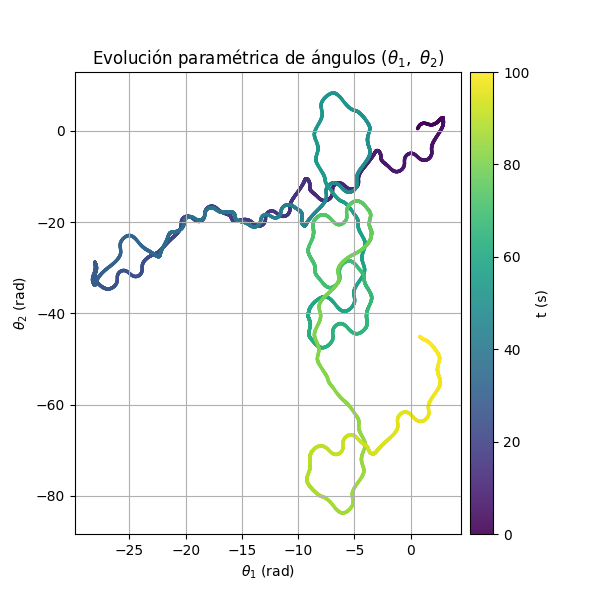

In [5]:
grafica_parametrica_angulos(theta1_0=np.pi/5, theta2_0=np.pi/7,
                            w1_0=1.4, w2_0=5.7,
                            L1=4.0, L2=1.0,
                            m1=4.0, m2=9.0,
                            g=5.81,T=100.0,
                            wrap='unwrap')